### **Parametric & Non-Parametric Testing of Hypothesis**

In [1]:
# Import the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

### **Case study - Credit Card Usage** 
1. Credit card usage has been improved significanlty from last year usage that is 50. 
    - (Hint: use the 'Post_usage_1month' post campaign of 1 month with last year compare it with 50 (hypothesized value))
2. The last campaign was successful in terms usage of credit card. 
    - (Hint comparning means for card usage of pre and post usage of campaign).
3. Is there any difference between males and females in terms of credit card usage? 
    - (Hint: Comparing means of Card usage for males and females)
4. Is there any difference between segments of customers in terms of credit card usage? 
    - (Hint: Comparning means of card usage of different segment customers)
5. Is there any relation between region and segment? 
    - (Hint: Finding the relationship between categorical variables and Segment)
6. Is the relationship between card usage in the latest month and pre usage of campaign? 
    - (Hint: find the correlation between latest_mon_usage and pre_usage)

In [37]:
# Read the dataset
cc = pd.read_csv('E:/1. University Teaching Data/9. PU-CSAS/2. Python Programming for Data Analysis/9. Testing of Hypothesis Using Python/cust_seg.csv')
cc.head()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2


In [38]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


1. Credit card usage has been improved significanlty from last year usage that is 50. 
   - (Hint: use the 'Latest_mon_usage' post campaign of 1 month with last year compare it with 50 (hypothesized value))
##### **One Sample t test Vs One-sample Wilcoxon Signed Rank Test**
    - H0 (Null hypothesis) Avg = 50
    - H1 (ALTERNATIVE hypothesis) Avg > 50

##### Descriptive Statistics

In [39]:
cc['Latest_mon_usage'].describe()

count    200.000000
mean      63.174000
std       11.242137
min       39.600000
25%       54.000000
50%       62.400000
75%       70.800000
max       90.000000
Name: Latest_mon_usage, dtype: float64

##### Test normality of data distribution

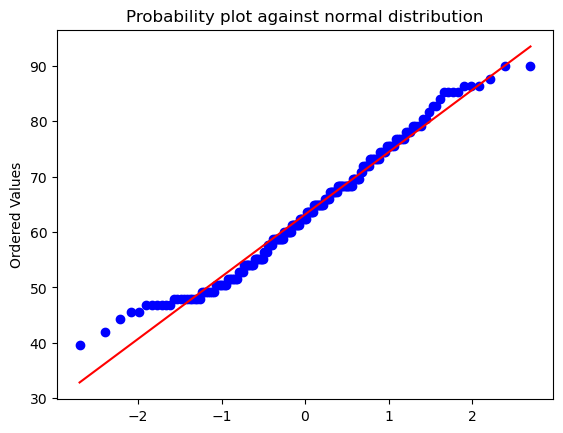

In [40]:
# Probability Plot (Normal Distribution)
stats.probplot(cc['Latest_mon_usage'], dist=stats.norm, plot=plt)
plt.xlabel('')
plt.title('Probability plot against normal distribution')
plt.show()

In [41]:
# Shapiro-Wilk test
stats.shapiro(cc['Latest_mon_usage'])

ShapiroResult(statistic=0.9768073558807373, pvalue=0.0021451807115226984)

##### Perform one-sample t-test & confidence interval

In [42]:
# One Sample t test
stats.ttest_1samp(cc['Latest_mon_usage'],popmean=50)

TtestResult(statistic=16.57233752433133, pvalue=2.4963719280931583e-39, df=199)

In [43]:
# Confidence Interval for population mean 
stats.ttest_1samp(cc['Latest_mon_usage'],popmean=50).confidence_interval(confidence_level=0.95)

ConfidenceInterval(low=61.60641452958582, high=64.74158547041418)

##### Perform One-sample Wilcoxon Signed Rank Test

In [48]:
hypothizedvalue = 50
stats.wilcoxon(cc['Latest_mon_usage']-hypothizedvalue)

WilcoxonResult(statistic=890.0, pvalue=5.190524442791987e-29)

2. The last campaign was successful in terms usage of credit card. 
   - (Hint comparning means for card usage of pre and post usage of campaign).
##### **Paried t test Vs Wilcoxon Signed Rank Test**
    - H0 (NULL hypothesis) Pre_avg = post_avg
    - H1 (ALTERNATIVE hypothesis) pre_avg < post_avg

##### Descriptive Statistics

In [49]:
cc[['pre_usage','Post_usage_1month','post_usage_2ndmonth']].describe()

,pre_usage,Post_usage_1month,post_usage_2ndmonth
count,200.000000,200.000000,200.000000
mean,52.230000,52.775000,58.052500
std,10.252937,9.478586,10.426445
min,28.000000,31.000000,34.100000
25%,44.000000,45.750000,50.325000
50%,50.000000,54.000000,59.400000
75%,60.000000,60.000000,66.000000
max,76.000000,67.000000,73.700000


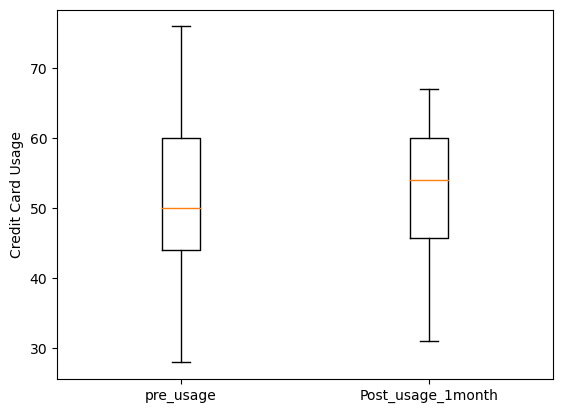

In [50]:
# Box Plot
fig = plt.figure()
ax = fig.add_subplot(111) # 111 is equivalent to nrows=1, ncols=1, plot_number=1.
ax.boxplot([cc['pre_usage'], cc['Post_usage_1month']])
ax.set_xticklabels(['pre_usage', 'Post_usage_1month'])
ax.set_ylabel('Credit Card Usage')
plt.show()

##### Normality Test

In [51]:
# Shapiro-Wilk test
stats.shapiro(cc['pre_usage'])

ShapiroResult(statistic=0.9797889590263367, pvalue=0.0055525763891637325)

In [52]:
# Shapiro-Wilk test
stats.shapiro(cc['Post_usage_1month'])

ShapiroResult(statistic=0.9470317363739014, pvalue=9.86553914117394e-07)

##### Perform Paired Sample T-test

In [63]:
stats.ttest_rel(cc['pre_usage'], cc['Post_usage_1month'])
# stats.ttest_rel(cc['pre_usage'], cc['post_usage_2ndmonth']) # pre Vs post_usage_2ndmonth

TtestResult(statistic=-0.8673065458794775, pvalue=0.3868186820914985, df=199)

##### Perform Wilcoxon Signed Rank Test

In [65]:
stats.wilcoxon(cc['pre_usage'], cc['Post_usage_1month'])
# stats.wilcoxon(cc['pre_usage'], cc['post_usage_2ndmonth']) # pre Vs post_usage_2ndmonth

WilcoxonResult(statistic=7944.0, pvalue=0.36626485210639514)

3. Is there any difference between males and females in terms of credit card usage? 
   - (Hint: Comparing means of Card usage for males and females)
##### **Two Samples Independent t test Vs Mann-Whitney U rank test**
     - H0: males_avg_usage = females_avg_usage
     - H1: males_avg_usage != females_avg_usage

##### Descriptive Statistics

In [68]:
# Note:- 0: Male , 1: Female
cc.groupby('sex')['Post_usage_1month'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,91.0,50.120879,10.305161,31.0,41.0,52.0,59.0,67.0
1,109.0,54.990826,8.133715,35.0,50.0,57.0,62.0,67.0


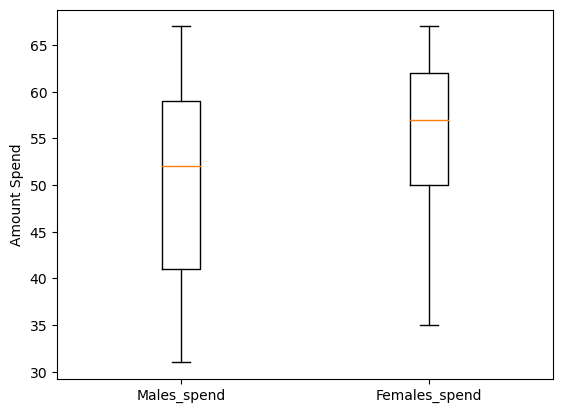

In [69]:
# Box Plot
Males_spend = cc.Post_usage_1month[cc.sex == 0]
Females_spend = cc.Post_usage_1month[cc.sex == 1]

fig = plt.figure()
ax = fig.add_subplot(111) # 111 is equivalent to nrows=1, ncols=1, plot_number=1.
ax.boxplot([Males_spend, Females_spend])
ax.set_xticklabels(['Males_spend', 'Females_spend'])
ax.set_ylabel('Amount Spend')
plt.show()

##### Normality Test

In [70]:
# Shapiro-Wilk test
stats.shapiro(Males_spend)

ShapiroResult(statistic=0.9498997926712036, pvalue=0.0015366101870313287)

In [71]:
# Shapiro-Wilk test
stats.shapiro(Females_spend)

ShapiroResult(statistic=0.9458567500114441, pvalue=0.00023407681146636605)

##### Test for the equality of variances

In [72]:
# Test for the equality of variances (Bartlett’s test)
stats.bartlett(Males_spend, Females_spend)

BartlettResult(statistic=5.497168500906791, pvalue=0.019047291264554674)

In [73]:
# Test for the equality of variances (Levene’s test)
stats.levene(Males_spend, Females_spend)

LeveneResult(statistic=9.619690728787518, pvalue=0.0022059987932221757)

##### Perform a two-sample Independent t-test

In [75]:
# Perform a two-sample Independent t-test
stats.ttest_ind(Males_spend, Females_spend, equal_var = True)

Ttest_indResult(statistic=-3.7340738531536797, pvalue=0.00024625461203549315)

In [83]:
# Perform Welch's t-test 
stats.ttest_ind(Males_spend, Females_spend, equal_var = False)

Ttest_indResult(statistic=-3.656408047887528, pvalue=0.000340884935942662)

##### Perform a Mann-Whitney U test 

In [76]:
stats.mannwhitneyu(Males_spend, Females_spend)

MannwhitneyuResult(statistic=3606.0, pvalue=0.0008749398736361351)

4. Is there any difference between segments of customers in terms of credit card usage? 
    - (Hint: Comparning means of card usage of different segment customers)
##### **One Way ANOVA Vs Kruskal-Wallis H-test or Mood’s median test**
        - H0 : Seg1_avg = Seg2_avg = Seg3_avg
        - H1: One of the segment avg is different from others.

##### Descriptive Statistics

In [11]:
# Segment wise Last month's credit card usage
cc.groupby('segment')['Latest_mon_usage'].describe()

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
1,45.0,60.026667,8.930601,42.0,51.6,58.8,68.4,75.6
2,105.0,68.080000,10.476259,45.6,60.0,68.4,75.6,90.0
3,50.0,55.704000,9.545016,39.6,48.0,54.0,62.1,90.0


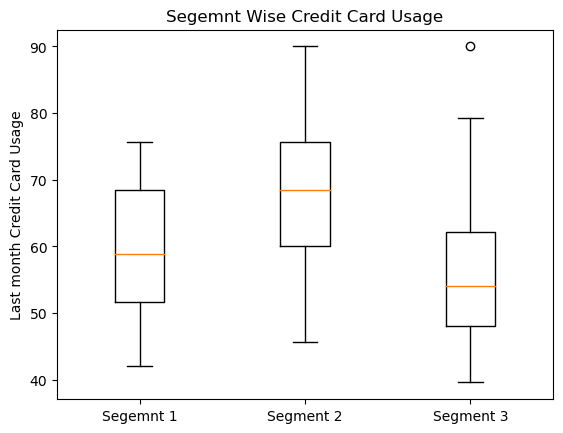

In [12]:
# Box Plot
seg1 = cc.Latest_mon_usage[cc.segment == 1]
seg2 = cc.Latest_mon_usage[cc.segment == 2]
seg3 = cc.Latest_mon_usage[cc.segment == 3]

fig = plt.figure()
ax = fig.add_subplot(111) # 111 is equivalent to nrows=1, ncols=1, plot_number=1.
ax.boxplot([seg1, seg2, seg3])
ax.set_xticklabels(['Segemnt 1', 'Segment 2' , 'Segment 3'])
ax.set_ylabel('Last month Credit Card Usage')
ax.set_title('Segemnt Wise Credit Card Usage')
plt.show()

##### Normality Test

In [13]:
# Shapiro-Wilk test
print(stats.shapiro(seg1))
print(stats.shapiro(seg2))
print(stats.shapiro(seg2))

ShapiroResult(statistic=0.9408790469169617, pvalue=0.02316742017865181)
ShapiroResult(statistic=0.9805310964584351, pvalue=0.12580201029777527)
ShapiroResult(statistic=0.9805310964584351, pvalue=0.12580201029777527)


##### Test for the equality of variances

In [14]:
# Test for the equality of variances (Bartlett’s test)
stats.bartlett(seg1, seg2, seg3)

BartlettResult(statistic=1.6776697797363391, pvalue=0.4322138068673279)

In [15]:
# Levene's test 
print('Levene test centered at the mean:', stats.levene(seg1,seg2, seg3, center='mean'))
print('Levene test centered at the median:', stats.levene(seg1,seg2, seg3, center='median'))

Levene test centered at the mean: LeveneResult(statistic=1.054127653756591, pvalue=0.3504535723326394)
Levene test centered at the median: LeveneResult(statistic=1.1576839472045337, pvalue=0.31634130188841664)


##### Perform One_Way ANOVA analysis

In [16]:
stats.f_oneway(seg1, seg2, seg3)

F_onewayResult(statistic=29.279283801321778, pvalue=7.36401083352674e-12)

##### Perform Tukey’s Test

In [30]:
# Using scipy's stats module
tukey = stats.tukey_hsd(seg1, seg2, seg3)
print(tukey)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -8.053     0.000   -12.228    -3.879
 (0 - 2)      4.323     0.088    -0.491     9.137
 (1 - 0)      8.053     0.000     3.879    12.228
 (1 - 2)     12.376     0.000     8.351    16.401
 (2 - 0)     -4.323     0.088    -9.137     0.491
 (2 - 1)    -12.376     0.000   -16.401    -8.351



In [24]:
# using statsmodels library
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=cc['Latest_mon_usage'], groups=cc['segment'], alpha=0.05)
#display results
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2   8.0533    0.0   3.8791 12.2275   True
     1      3  -4.3227 0.0883  -9.1366  0.4913  False
     2      3  -12.376    0.0 -16.4015 -8.3505   True
-----------------------------------------------------


##### Perform Kruskal-Wallis H-test

In [80]:
stats.kruskal(seg1, seg2, seg3)

KruskalResult(statistic=46.762677795367125, pvalue=7.00831376651474e-11)

##### Perform Mood’s median test

In [81]:
stats.median_test(seg1, seg2, seg3)

MedianTestResult(statistic=28.909875114495573, pvalue=5.27594649559273e-07, median=62.4, table=array([[20, 69, 10],
       [25, 36, 40]], dtype=int64))

5. Is there any relation between region and segment? 
    - (Hint: Finding the relationship between categorical variables (i.e., Region and Segment) - apply chisquare test)
##### Chisquare Test
        - H0: There is no relationship between Region and Segment
        - H1: There is a relationship between Region and Segment

In [85]:
# Perfrom cross tabulation
ct = pd.crosstab(cc.segment, cc.region, margins = True) # shows the actual distribution (observed values) between segment and region
ct 

region,1,2,3,All
segment,,,,
1,16,20,9,45
2,19,44,42,105
3,12,31,7,50
All,47,95,58,200


In [87]:
stats.chi2_contingency(observed = ct)

Chi2ContingencyResult(statistic=16.60444164948934, pvalue=0.055282939487992365, dof=9, expected_freq=array([[ 10.575,  21.375,  13.05 ,  45.   ],
       [ 24.675,  49.875,  30.45 , 105.   ],
       [ 11.75 ,  23.75 ,  14.5  ,  50.   ],
       [ 47.   ,  95.   ,  58.   , 200.   ]]))

6. Is the relationship between card usage in the latest month and pre usage of campaign? 
    - (Hint: find the correlation between latest_mon_usage and pre_usage)

##### **Correlation Coefficient & Correlation Test**
        - H0 : There is no relationship (Rho = 0)
        - H1 : There is relationship (Rho != 0)

In [91]:
# Correlation Coefficient
np.corrcoef(cc['Latest_mon_usage'], cc['Post_usage_1month'])

array([[1.        , 0.61744926],
       [0.61744926, 1.        ]])

In [92]:
# Correlation Test
stats.pearsonr(cc.Latest_mon_usage, cc.Post_usage_1month)

PearsonRResult(statistic=0.6174492644854919, pvalue=2.086664741687138e-22)